In [1]:
# boosting techniques : 
    # ada boost(adaptive boosting)
    # gradient boosting
    # xg boost(extreme gradient boosting)

# the boosting techniques are used when the data has more bias and less variance.

# ensemble.boosting techniques uses a set of weak decision tree models called as 'stump'. at first all the data points have same weights, after training the first stump, we compare the predictions of the first stump to the actual right prediction, the weights of all the wrong predictions are incresed and then the second stump is trained. this process continues until the desired number of stumps are trained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE #for oversampling.
from sklearn.model_selection import StratifiedShuffleSplit #for splitting the dataset.
from sklearn.preprocessing import LabelEncoder

# for classification
from sklearn.ensemble import AdaBoostClassifier # ada boost classifier
from sklearn.ensemble import GradientBoostingClassifier # gradient boost classifier
from xgboost import XGBClassifier #xg boost classifier
# !pip install xgboost


# for regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score # to test the accuracy of the KNN classification model

ModuleNotFoundError: No module named 'xgboost'

In [4]:
# dataset
df = pd.read_csv("customer_churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'].isnull().sum()

0

In [10]:
df['TotalCharges'].value_counts() #notice that the first value is ' '

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [11]:
df['TotalCharges'].isin([' ']).any() #you can notice that there is ' ' value in the 'TotalCharges' feature.

True

In [12]:
df["TotalCharges"].replace(" ", np.nan, inplace = True) #removing ' '
df['TotalCharges'].isin([' ']).any()

False

In [13]:
df['TotalCharges'].isnull().sum()

11

In [14]:
# we will be removing the rows which has null values.
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2076\568625789.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tenure'], shade  = True)


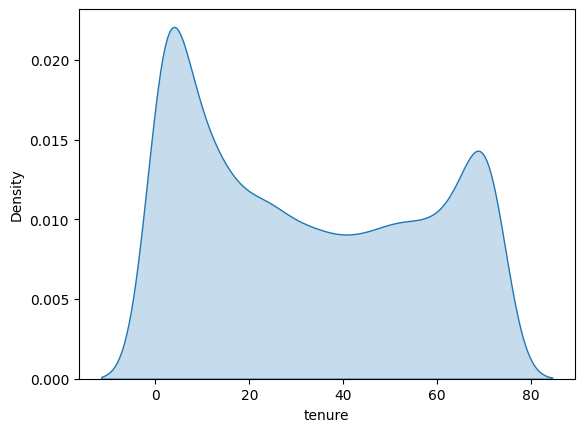

In [17]:
sns.kdeplot(df['tenure'], shade  = True)
plt.show()

from the above kernal density estimation plot, we can notice that most of the customers are either relatively new(0-9 months) or long term customers(60 - 80 months)

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2076\3655558616.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MonthlyCharges'], shade = True)


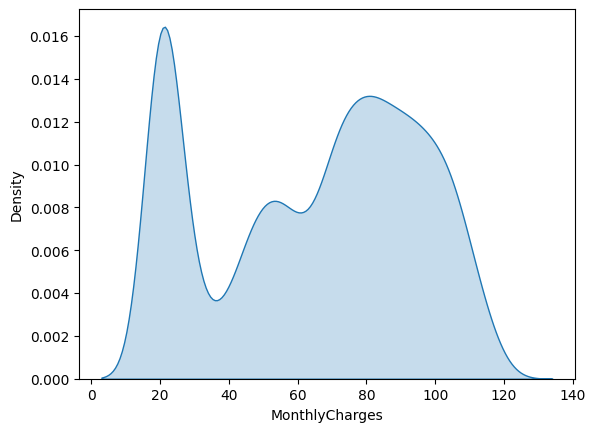

In [18]:
sns.kdeplot(df['MonthlyCharges'], shade = True)
plt.show()

here, we can notice that most of the customers pay either 10 - 30 dollars per month or else 70+ dollars per month.

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_2076\3348600803.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['TotalCharges'], shade = True)


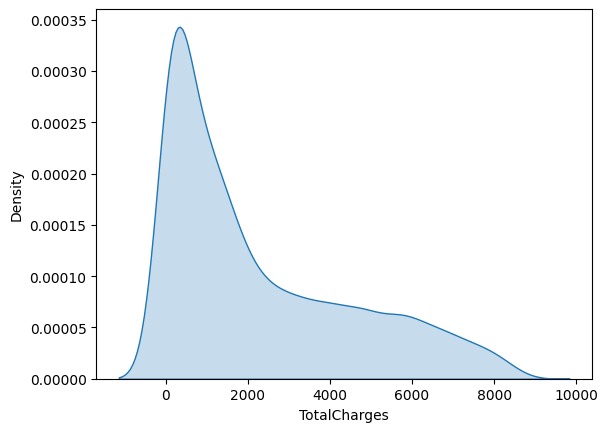

In [19]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
sns.kdeplot(df['TotalCharges'], shade = True)
plt.show()

from the above graph we can notice that most of the customers are willing to pay less than 2000 dollars and the customers are less willing to pay more. 

In [20]:
df.drop(columns = ['customerID'], inplace = True)

In [27]:
# splititng the data
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42).split(df, df['Churn'])
for train, test in split:
    x_train = df.iloc[train].drop(columns = ['Churn'])
    y_train = df.iloc[train]['Churn']
    x_test = df.iloc[test].drop(columns = ['Churn'])
    y_test = df.iloc[test]['Churn']

In [29]:
# encoding the data

le = LabelEncoder()

for i in x_train.columns:
    if x_train[i].dtype == 'object':
        x_train[i] = le.fit_transform(x_train[i])
        x_test[i] = le.transform(x_test[i])

In [30]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,1,0,1,1,65,1,2,1,2,2,2,2,0,0,2,0,1,94.55,6078.75
7003,1,0,0,0,26,0,1,0,0,0,2,2,0,0,0,0,2,35.75,1022.50
3355,0,0,1,0,68,1,2,1,0,2,2,2,0,0,2,0,1,90.20,6297.65
4494,1,0,0,0,3,1,0,1,0,2,0,0,0,2,0,0,2,84.30,235.05
3541,0,0,1,0,49,0,1,0,2,0,0,0,2,0,0,0,0,40.65,2070.75


In [31]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
974,0,0,1,1,59,1,0,0,0,2,0,2,2,2,2,1,1,75.95,4542.35
619,0,0,0,0,7,1,2,1,0,2,0,0,0,0,0,1,0,78.55,522.95
4289,0,0,0,0,54,1,0,2,1,1,1,1,1,1,2,0,3,20.10,1079.45
3721,0,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,20.65,38.70
4533,0,0,1,0,71,1,2,1,0,2,2,0,2,2,2,1,0,105.15,7555.00


In [32]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [33]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [35]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
df['Churn'].value_counts() #here you can notice that ratio of number of 'no' and number of 'yes' is 1:2.7 which means 'no' is almost 3X of 'yes'. 

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [38]:
# we will perform over sampling on the train set to increase the number of 'yes' in the dataset
smote = SMOTE(random_state = 42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [39]:
y_train = pd.Series(y_train)
y_train.value_counts()

0    4130
1    4130
Name: count, dtype: int64

we have successfully increased number of 'yes' equal to number of 'no'. do not perform this on the test set.

# ADA boost

In [41]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
y_pred = ada_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7469793887704336

# GRADIENT boost

In [42]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7562189054726368

In [44]:
xgb_classifier  = XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7590618336886994

In [ ]:
# similarly you can use AdaBoostRegressor, GradientBoostingRegressor and XGBRegressor for regression